In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install p7zip-full unzip -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import os

# 압축 파일 경로 설정
zip_path = '/content/drive/MyDrive/Colab Notebooks/mercari-price-suggestion-challenge.zip'
extract_path = '/content/mercari_data'

# 압축 해제 디렉토리 생성
!mkdir -p {extract_path}

# 압축 해제
!unzip -q "{zip_path}" -d "{extract_path}"

# 압축 해제된 파일 목록 확인
print("압축 해제된 파일:")
!ls "{extract_path}"

압축 해제된 파일:
sample_submission.csv.7z	test_stg2.tsv.zip  train.tsv.7z
sample_submission_stg2.csv.zip	test.tsv.7z


In [ ]:
# train.tsv.7z 해제
!7z x "{extract_path}/train.tsv.7z" -o"{extract_path}" -y

# test.tsv.7z 해제
!7z x "{extract_path}/test.tsv.7z" -o"{extract_path}" -y

# sample_submission.csv.7z 해제
!7z x "{extract_path}/sample_submission.csv.7z" -o"{extract_path}" -y


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/mercari_data/                                1 file, 77912192 bytes (75 MiB)

Extracting archive: /content/mercari_data/train.tsv.7z
--
Path = /content/mercari_data/train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      2% - train.tsv                  4% - train.tsv                  7% - train.tsv                  9% - train.tsv                 12% - train.tsv                 14% - train.tsv                 17% - train.t

In [ ]:
# test_stg2.tsv.zip 해제
!unzip -q "{extract_path}/test_stg2.tsv.zip" -d "{extract_path}"

# sample_submission_stg2.csv.zip 해제
!unzip -q "{extract_path}/sample_submission_stg2.csv.zip" -d "{extract_path}"

In [ ]:
import pandas as pd

# Train 데이터 읽기
train = pd.read_csv(f"{extract_path}/train.tsv", sep='\t', encoding='utf-8')
print("Train 데이터 shape:", train.shape)
print(train.head())

# Test 데이터 읽기
test = pd.read_csv(f"{extract_path}/test.tsv", sep='\t', encoding='utf-8')
print("\nTest 데이터 shape:", test.shape)
print(test.head())

# Test Stage 2 데이터 읽기
test_stg2 = pd.read_csv(f"{extract_path}/test_stg2.tsv", sep='\t', encoding='utf-8')
print("\nTest Stage 2 데이터 shape:", test_stg2.shape)
print(test_stg2.head())

# Sample Submission 데이터 읽기
sample_submission = pd.read_csv(f"{extract_path}/sample_submission.csv")
print("\nSample Submission 데이터 shape:", sample_submission.shape)
print(sample_submission.head())

# Sample Submission Stage 2 데이터 읽기
sample_submission_stg2 = pd.read_csv(f"{extract_path}/sample_submission_stg2.csv")
print("\nSample Submission Stage 2 데이터 shape:", sample_submission_stg2.shape)
print(sample_submission_stg2.head())

Train 데이터 shape: (1482535, 8)
   train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  
0         1                      

In [ ]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
train.isnull().sum()  #브랜드 카테고리 설명 결측치

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          6
dtype: int64

In [ ]:
df = pd.DataFrame(train)

In [ ]:
(df['price'] <= 0).sum() # 가격이 0이거나 0보다 적으면 이상치

874

# 데이터 전처리

#결측치

In [ ]:
df['category_name'] = df['category_name'].fillna('Unknown/Unknown/Unknown')
df[['category1', 'category2', 'category3']] = df['category_name'].str.split('/', n=2, expand=True)
df[['category1', 'category2', 'category3']] = df[['category1', 'category2', 'category3']].fillna('Unknown')
#

In [ ]:
df['brand_name'] = df['brand_name'].fillna('No Brand')
# df['has_brand'] = (df['brand_name'] != 'No Brand').astype(int)
df['item_description'] = df['item_description'].fillna('No description')
# df['has_description'] = (df['item_description'] != 'No description').astype(int)
df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
category1            0
category2            0
category3            0
dtype: int64

### 이상치

In [ ]:
df = df[df['price']>0]

In [ ]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category1,category2,category3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,No Brand,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No Brand,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


# EDA

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
!pip install koreanize-matplotlib
import koreanize_matplotlib

### Category

<ipython-input-36-d7fdc78a69e2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category1', y='count', data=count_df, palette='husl')


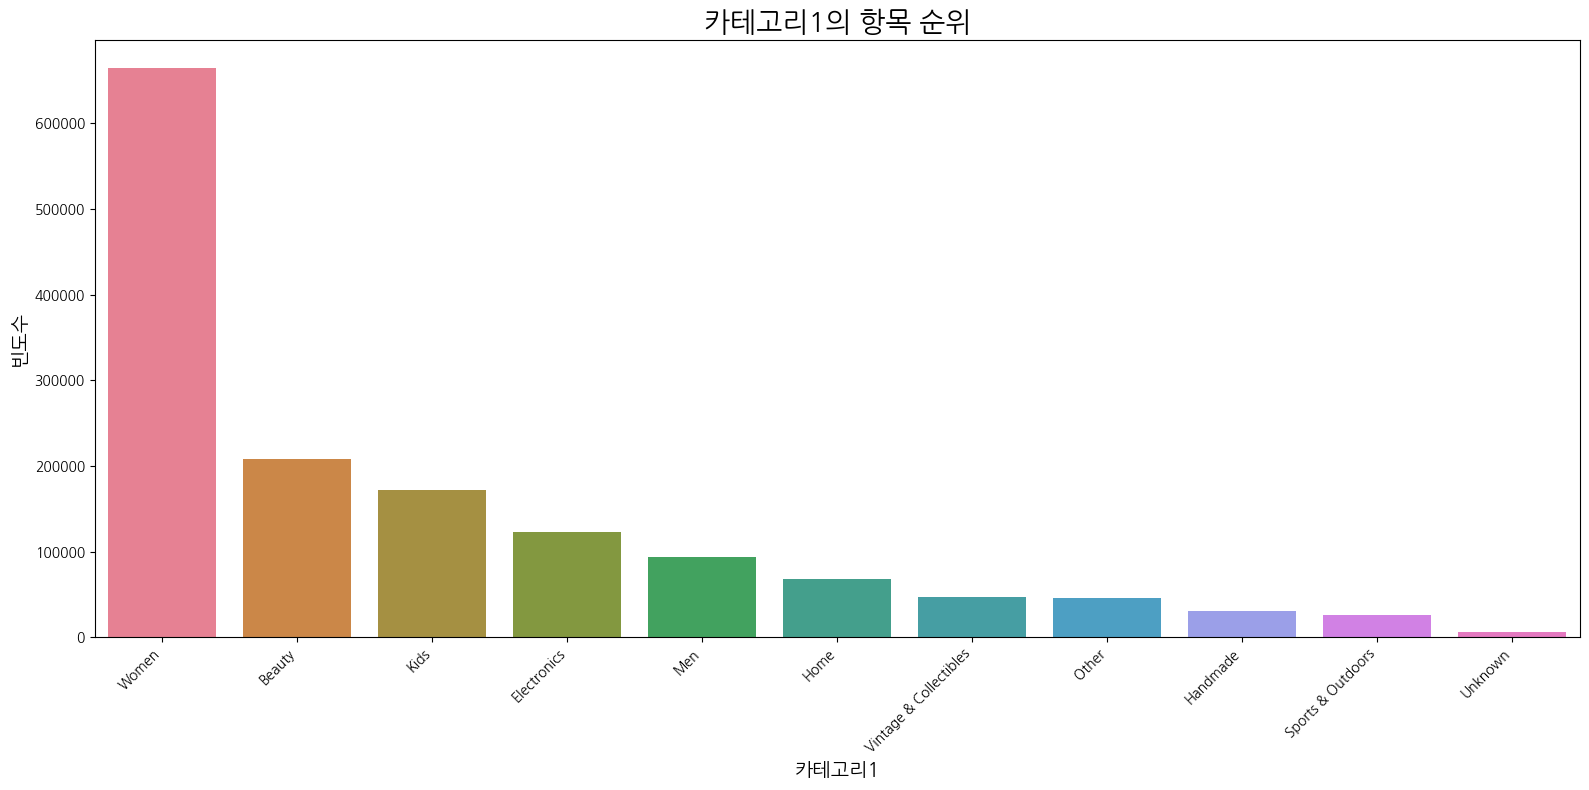

In [ ]:
# category1의 빈도수 계산
count = df['category1'].value_counts()

# 데이터프레임으로 변환
count_df = count.reset_index()
count_df.columns = ['category1', 'count']

plt.figure(figsize=(16, 8))
sns.barplot(x='category1', y='count', data=count_df, palette='husl')
plt.title("카테고리1의 항목 순위", fontsize=20)
plt.xlabel('카테고리1', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [ ]:
#카테고리1 가격박스플롯
cat1_median_price = df.groupby('category1')['price'].median().reset_index()

top_25_cat1 = cat1_median_price.sort_values(by='price', ascending=False)

<ipython-input-76-805fd4963d37>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


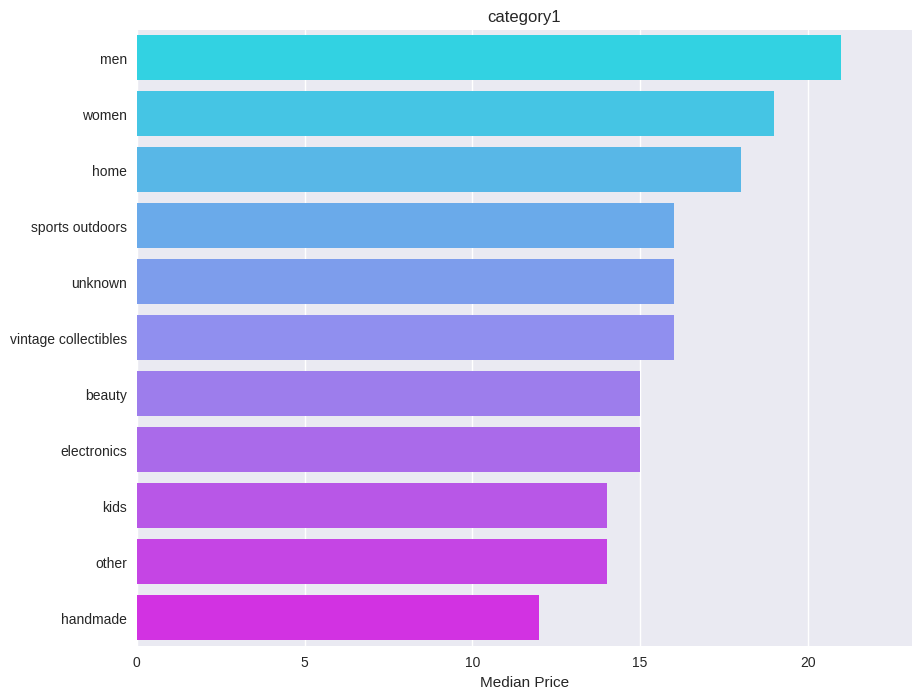

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_25_cat1,
    x='price',
    y='category1',
    palette='cool'
)
plt.xlabel('Median Price')
plt.ylabel('')
plt.title('category1')
plt.xlim(0, cat1_median_price['price'].max() * 1.1)
plt.show()

- 상위 3개의 카테고리가 여성, 뷰티, 아동인 것을 알 수 있다.

<ipython-input-40-8ad4f7f3b75a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category2', y='count', data=top_20_count_df, palette='husl')


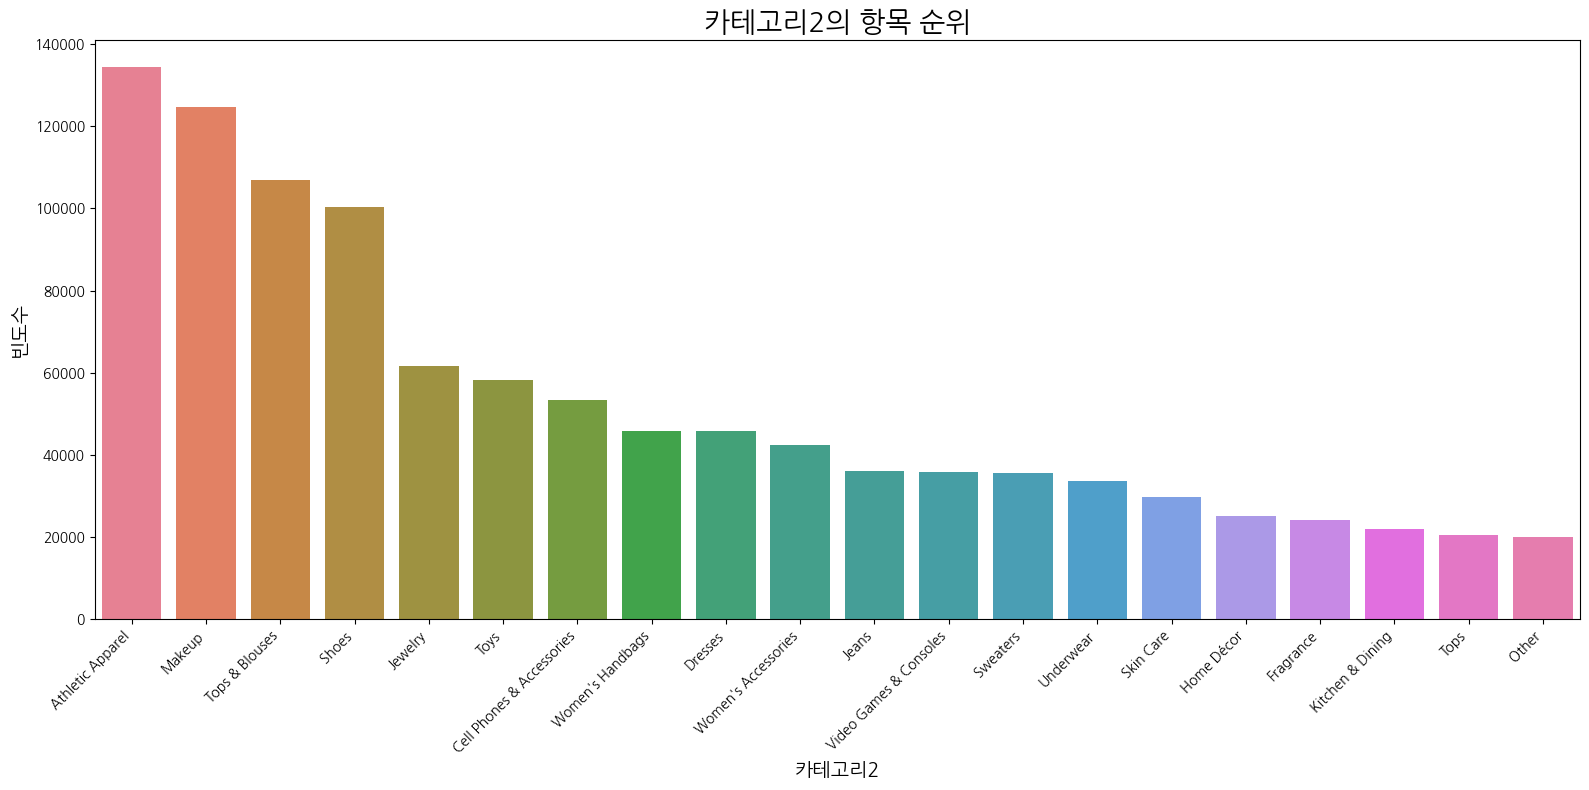

In [ ]:
# category2의 빈도수 계산
count = df['category2'].value_counts()

# 데이터프레임으로 변환
count_df = count.reset_index()
count_df.columns = ['category2', 'count']
top_20_count_df = count_df.head(20)


plt.figure(figsize=(16, 8))
sns.barplot(x='category2', y='count', data=top_20_count_df, palette='husl')
plt.title("카테고리2의 항목 순위", fontsize=20)
plt.xlabel('카테고리2', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<ipython-input-41-30aea3b43951>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category3', y='count', data=top_20_count_df, palette='husl')


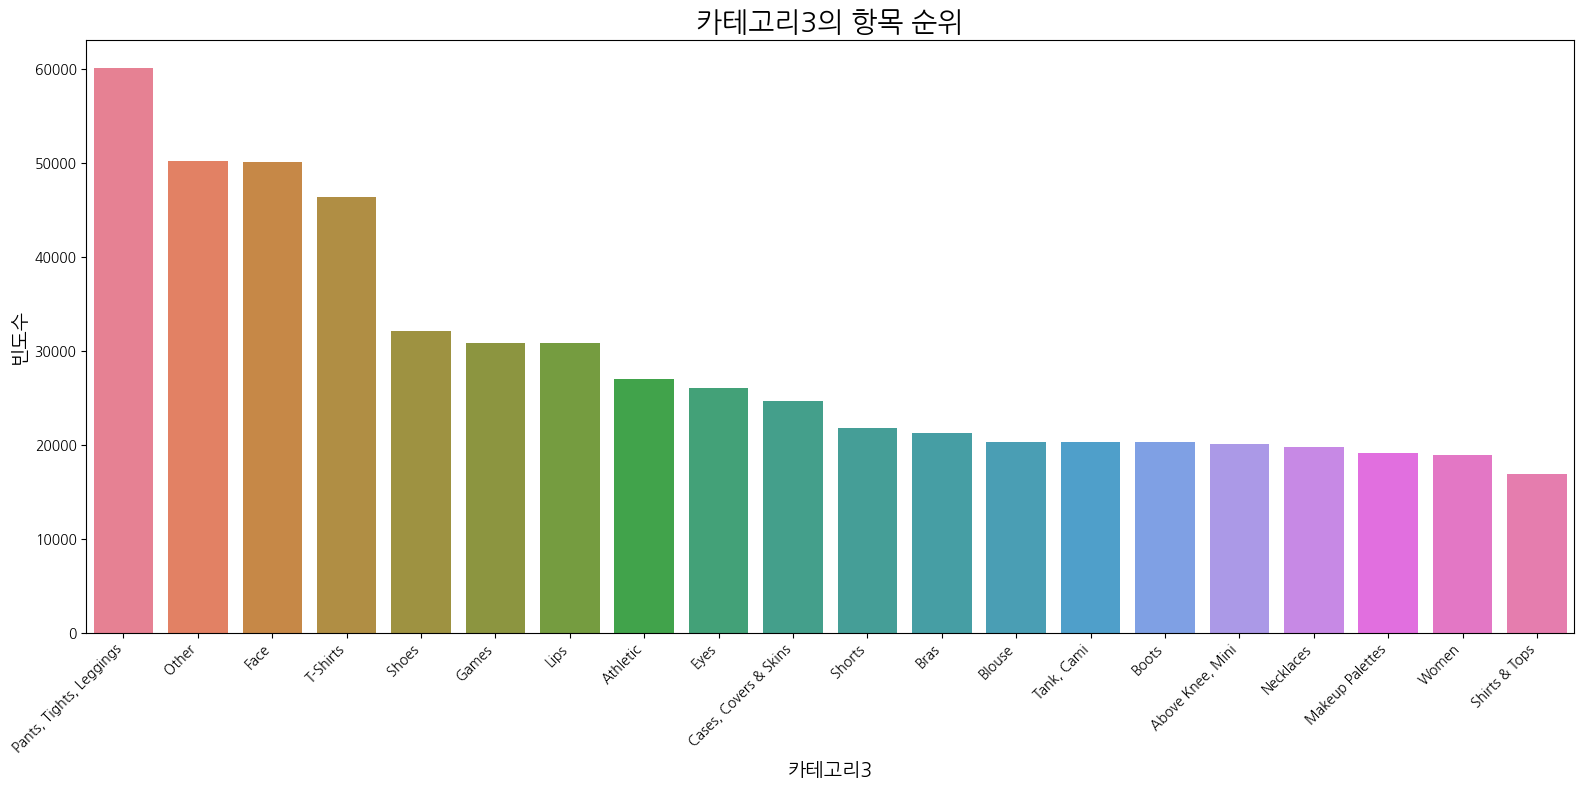

In [ ]:
# category3의 빈도수 계산
count = df['category3'].value_counts()

# 데이터프레임으로 변환
count_df = count.reset_index()
count_df.columns = ['category3', 'count']
top_20_count_df = count_df.head(20)

plt.figure(figsize=(16, 8))
sns.barplot(x='category3', y='count', data=top_20_count_df, palette='husl')
plt.title("카테고리3의 항목 순위", fontsize=20)
plt.xlabel('카테고리3', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### Brand

<ipython-input-49-07d160197444>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_brands_excluding_first.index, y=top_10_brands_excluding_first.values, palette='husl')


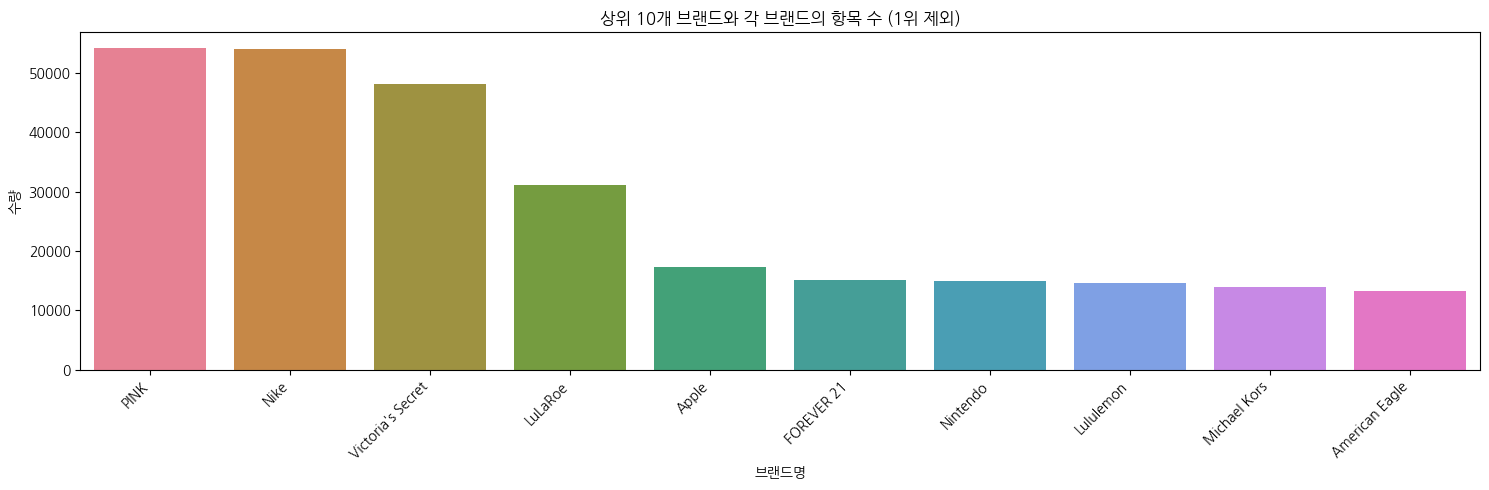

In [ ]:
brands =df['brand_name'].value_counts()
top_10_brands_excluding_first = brands[1:11]

# 상위 1개 브랜드를 제외한 상위 10개 브랜드의 빈도수 막대 그래프
plt.figure(figsize=(15, 5))
sns.barplot(x=top_10_brands_excluding_first.index, y=top_10_brands_excluding_first.values, palette='husl')
plt.title('상위 10개 브랜드와 각 브랜드의 항목 수 (1위 제외)')
plt.xlabel('브랜드명')
plt.ylabel('수량')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#브랜드와 가격 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#가장 비싼 브랜드 찾기
brand_median_price = df.groupby('brand_name')['price'].median().reset_index()

top_25_brands = brand_median_price.sort_values(by='price', ascending=False).head(25)

<ipython-input-74-ee05e40031f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


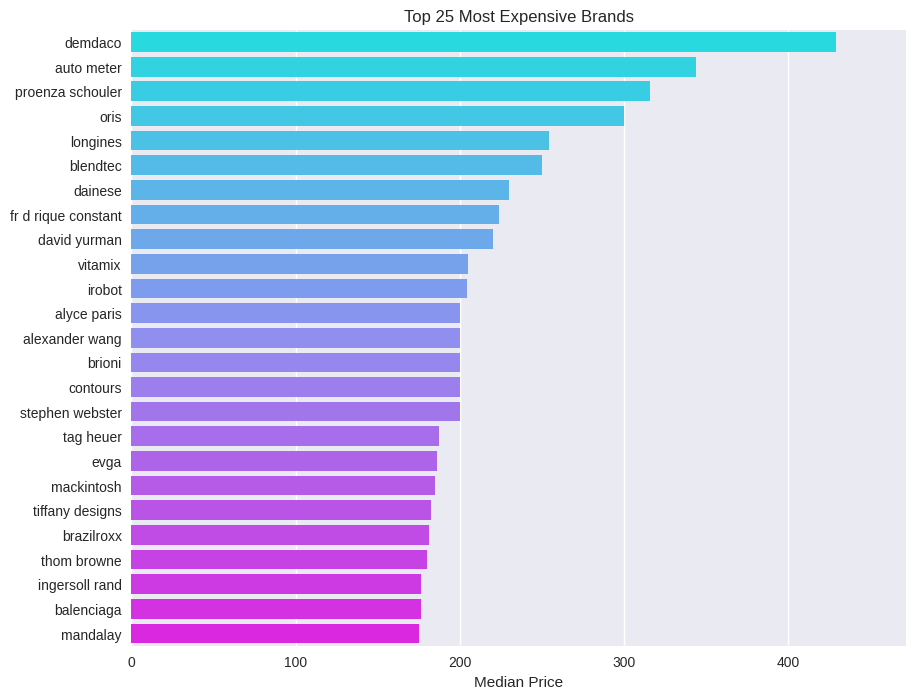

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_25_brands,
    x='price',
    y='brand_name',
    palette='cool'
)
plt.xlabel('Median Price')
plt.ylabel('')
plt.title('Top 25 Most Expensive Brands')
plt.xlim(0, top_25_brands['price'].max() * 1.1)
plt.show()

### Item Condition

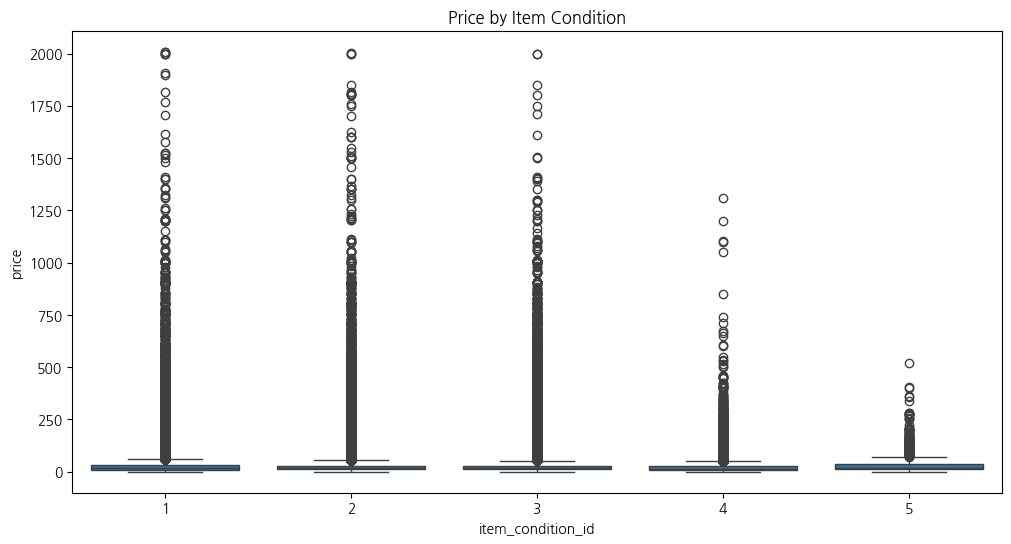

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='item_condition_id', y='price', data=df)
plt.title('Price by Item Condition')
plt.show()
# 이상치 -> 여기서만 빼야대나?

<ipython-input-50-620ca0aa55eb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='item_condition_id', y='count', data=count_df,  palette='husl')


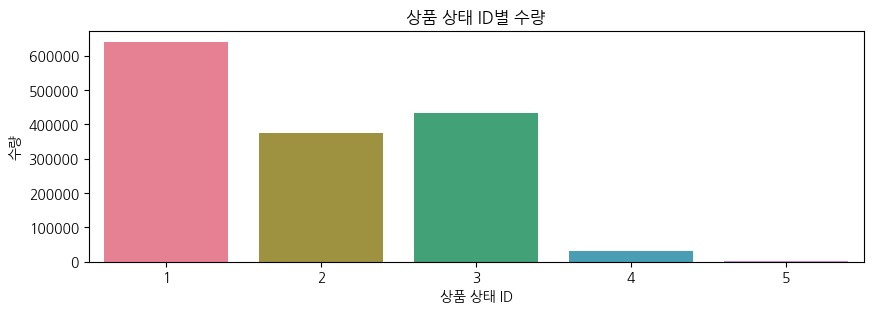

In [ ]:
# item_condition_id 별 빈도수 계산
count = df['item_condition_id'].value_counts()

# 상위 5개 항목으로 제한
count = count.head(5)

# 상위 5개 항목을 데이터프레임으로 변환
count_df = count.reset_index()
count_df.columns = ['item_condition_id', 'count']

plt.figure(figsize=(10, 3))
sns.barplot(x='item_condition_id', y='count', data=count_df,  palette='husl')
plt.title('상품 상태 ID별 수량')
plt.xlabel('상품 상태 ID')
plt.ylabel('수량')
plt.show()

### Shipping

In [ ]:
count=df['shipping'].value_counts() # 0,1 -> 0이 사는사람이 배송료를 내는거 1이 파는사람이 내는거

### Price

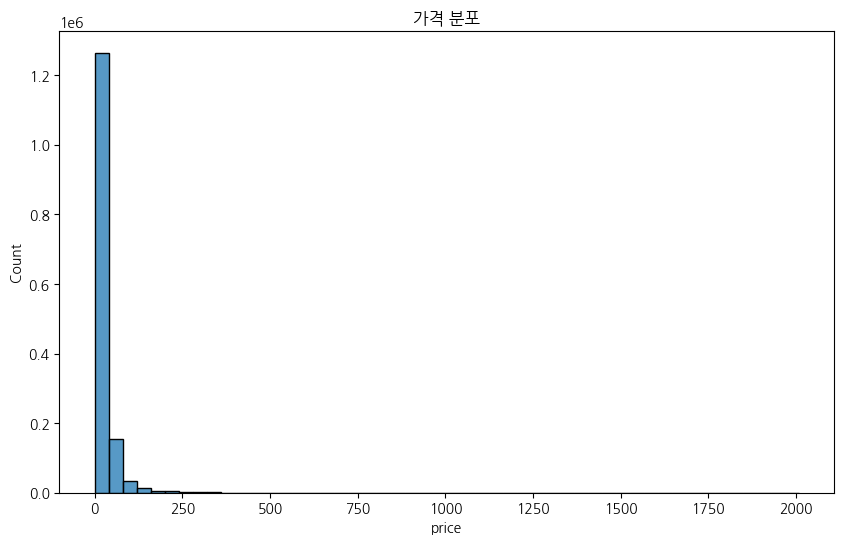

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50)
plt.title('가격 분포')
plt.show()

### 텍스트 분석

In [ ]:
def preprocess(Input_text):

  # 입력 텍스트의 처음 60 단어만 사용
  cleantext = ' '.join( [w for w in Input_text.split()[:60]] )

  # HTML 태그 제거
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', cleantext)

  # 이메일 주소 제거
  cleantext = re.sub(r'\S*@\S*\s?', ' ', cleantext)

  # 대괄호나 소괄호로 둘러싸인 텍스트 제거
  cleantext = re.sub("[\(\[].*?[\)\]]", "", cleantext)

  # "word: " 형식의 텍스트 제거
  cleantext = re.sub(r'\w+:\s?','',cleantext)

  # 축약형 변환
  cleantext = re.sub(r"\'m", " am", cleantext)
  cleantext = re.sub(r"n\'t", " not", cleantext)
  cleantext = re.sub(r"\'t", " not", cleantext)
  cleantext = re.sub(r"\'s", " is", cleantext)
  cleantext = re.sub(r"\'ve", " have", cleantext)
  cleantext = re.sub(r"\'re", " are", cleantext)
  cleantext = re.sub(r"\'ll", " will", cleantext)
  cleantext = re.sub(r"won't", "will not", cleantext)
  cleantext = re.sub(r"can\'t", "can not", cleantext)
  cleantext = re.sub(r"\'d", " would", cleantext)

  # 숫자 제거
  cleantext = re.sub(r'[0-9]+', '', cleantext)

  # 소문자로 변환
  cleantext = cleantext.lower()

  # 알파벳 이외의 문자 제거
  cleantext = re.sub(r'[^a-zA-Z]+', ' ', cleantext)

  return cleantext

In [ ]:
import re

# 자주 사용되는 정규 표현식 패턴을 미리 컴파일
HTML_CLEANER = re.compile('<.*?>')
EMAIL_CLEANER = re.compile(r'\S*@\S*\s?')
URL_CLEANER = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
PARENTHESES_CLEANER = re.compile(r"[\(\[].*?[\)\]]")
WORD_COLON_CLEANER = re.compile(r'\w+:\s?')
NUMBER_CLEANER = re.compile(r'[0-9]+')
NON_ALPHA_CLEANER = re.compile(r'[^a-zA-Z]+')

def preprocess(Input_text):
    # 입력 텍스트의 처음 60개 단어만 사용
    cleantext = ' '.join([w for w in Input_text.split()[:60]])

    # HTML 태그, 이메일, URL 제거
    cleantext = HTML_CLEANER.sub('', cleantext)
    cleantext = EMAIL_CLEANER.sub(' ', cleantext)
    cleantext = URL_CLEANER.sub(' ', cleantext)

    # 괄호 안의 내용 제거
    cleantext = PARENTHESES_CLEANER.sub("", cleantext)

    # 단어 뒤의 콜론 제거
    cleantext = WORD_COLON_CLEANER.sub('', cleantext)

    # 축약형 처리 (기존 + 추가)
    contractions = {
        r"\'m": " am", r"n\'t": " not", r"\'t": " not", r"\'s": " is",
        r"\'ve": " have", r"\'re": " are", r"\'ll": " will",
        r"won\'t": "will not", r"can\'t": "can not", r"\'d": " would",
        r"y\'all": "you all", r"ain\'t": "is not", r"aren\'t": "are not",
        r"couldn\'t": "could not", r"didn\'t": "did not", r"doesn\'t": "does not",
        r"hadn\'t": "had not", r"hasn\'t": "has not", r"haven\'t": "have not",
        r"he\'d": "he would", r"he\'ll": "he will", r"he\'s": "he is",
        r"i\'d": "i would", r"i\'ll": "i will", r"i\'m": "i am",
        r"isn\'t": "is not", r"it\'s": "it is", r"let\'s": "let us",
        r"mightn\'t": "might not", r"mustn\'t": "must not", r"shan\'t": "shall not",
        r"she\'d": "she would", r"she\'ll": "she will", r"she\'s": "she is",
        r"shouldn\'t": "should not", r"that\'s": "that is", r"there\'s": "there is",
        r"they\'d": "they would", r"they\'ll": "they will", r"they\'re": "they are",
        r"they\'ve": "they have", r"we\'d": "we would", r"we\'re": "we are",
        r"weren\'t": "were not", r"what\'ll": "what will", r"what\'re": "what are",
        r"what\'s": "what is", r"what\'ve": "what have", r"where\'s": "where is",
        r"who\'d": "who would", r"who\'ll": "who will", r"who\'re": "who are",
        r"who\'s": "who is", r"who\'ve": "who have", r"won\'t": "will not",
        r"wouldn\'t": "would not", r"you\'d": "you would", r"you\'ll": "you will",
        r"you\'re": "you are", r"you\'ve": "you have"
    }

    for contraction, expansion in contractions.items():
        cleantext = re.sub(contraction, expansion, cleantext)

    # 숫자 제거
    cleantext = NUMBER_CLEANER.sub('', cleantext)

    # 소문자 변환
    cleantext = cleantext.lower()

    # 알파벳이 아닌 문자를 공백으로 대체
    cleantext = NON_ALPHA_CLEANER.sub(' ', cleantext)

    # 연속된 공백을 하나의 공백으로 치환
    cleantext = re.sub(r'\s+', ' ', cleantext).strip()

    return cleantext

In [ ]:
df['brand_name'] = df['brand_name'].apply(preprocess)
# X_test['brand_name'] = X_test['brand_name'].apply(preprocess)

df['name'] = df['name'].apply(preprocess)
# X_test['name'] = X_test['name'].apply(preprocess)

df['item_description'] = df['item_description'].apply(preprocess)
# X_test['item_description'] = X_test['item_description'].apply(preprocess)

In [ ]:
df['category1'] = df['category1'].apply(preprocess)
df['category2'] = df['category2'].apply(preprocess)
df['category3'] = df['category3'].apply(preprocess)
# X_test['cat_1'] = X_test['cat_1'].apply(preprocess)
# X_test['cat_2'] = X_test['cat_2'].apply(preprocess)
# X_test['cat_3'] = X_test['cat_3'].apply(preprocess)

In [ ]:
# 불용어 처리를 해야

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(max_features=1000)
vectorizer1.fit(df['name'].values)

df_name_tfidf = vectorizer1.transform(df['name'].values)
# X_test_name_tfidf = vectorizer1.transform(df['name'].values)

In [ ]:
vectorizer1 = TfidfVectorizer(min_df=10, max_features=5000) #ngram_range=(1,4)
vectorizer1.fit(df['item_description'].values)

df_id_tfidf = vectorizer1.transform(df['item_description'].values)
# X_test_id_tfidf = vectorizer1.transform(df['item_description'].values)

<ipython-input-71-4ffa89bf94ba>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


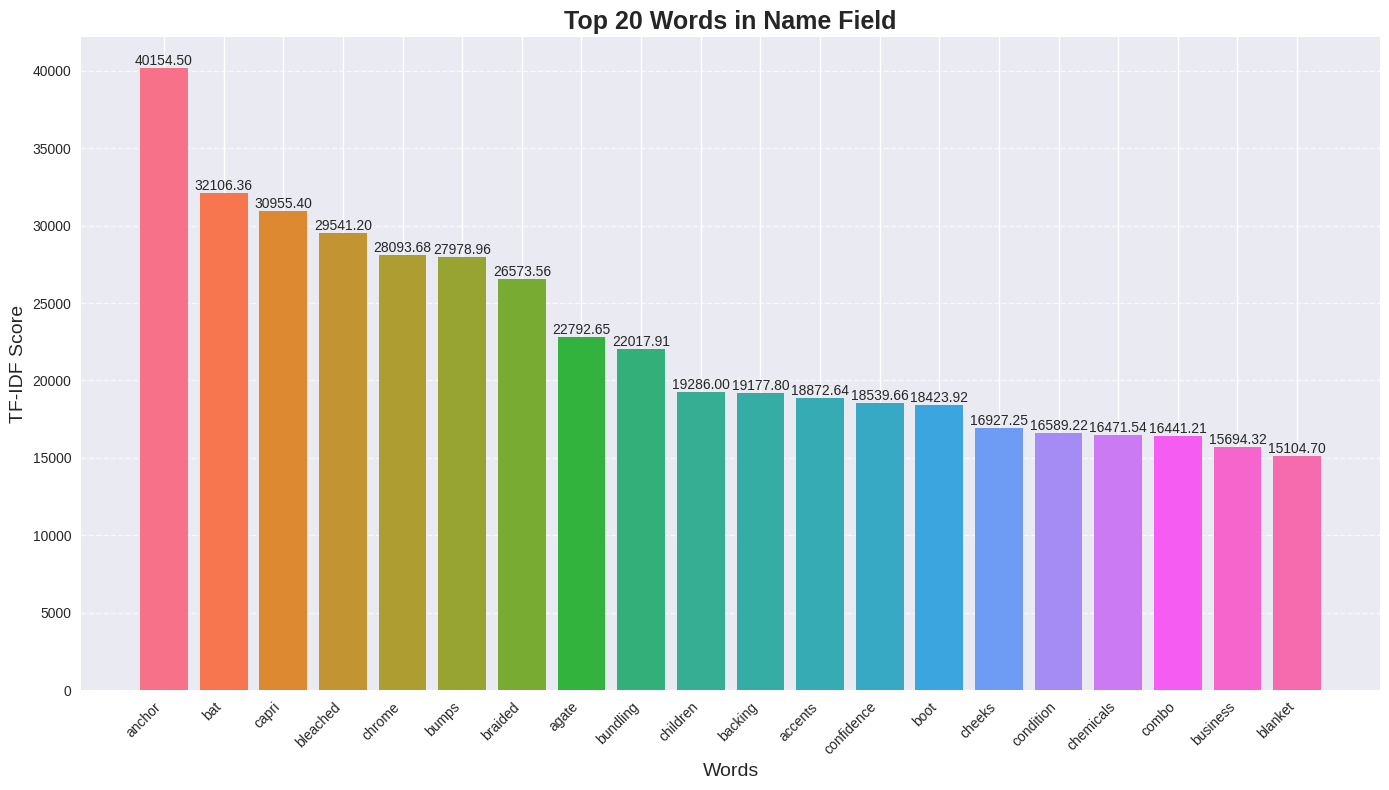

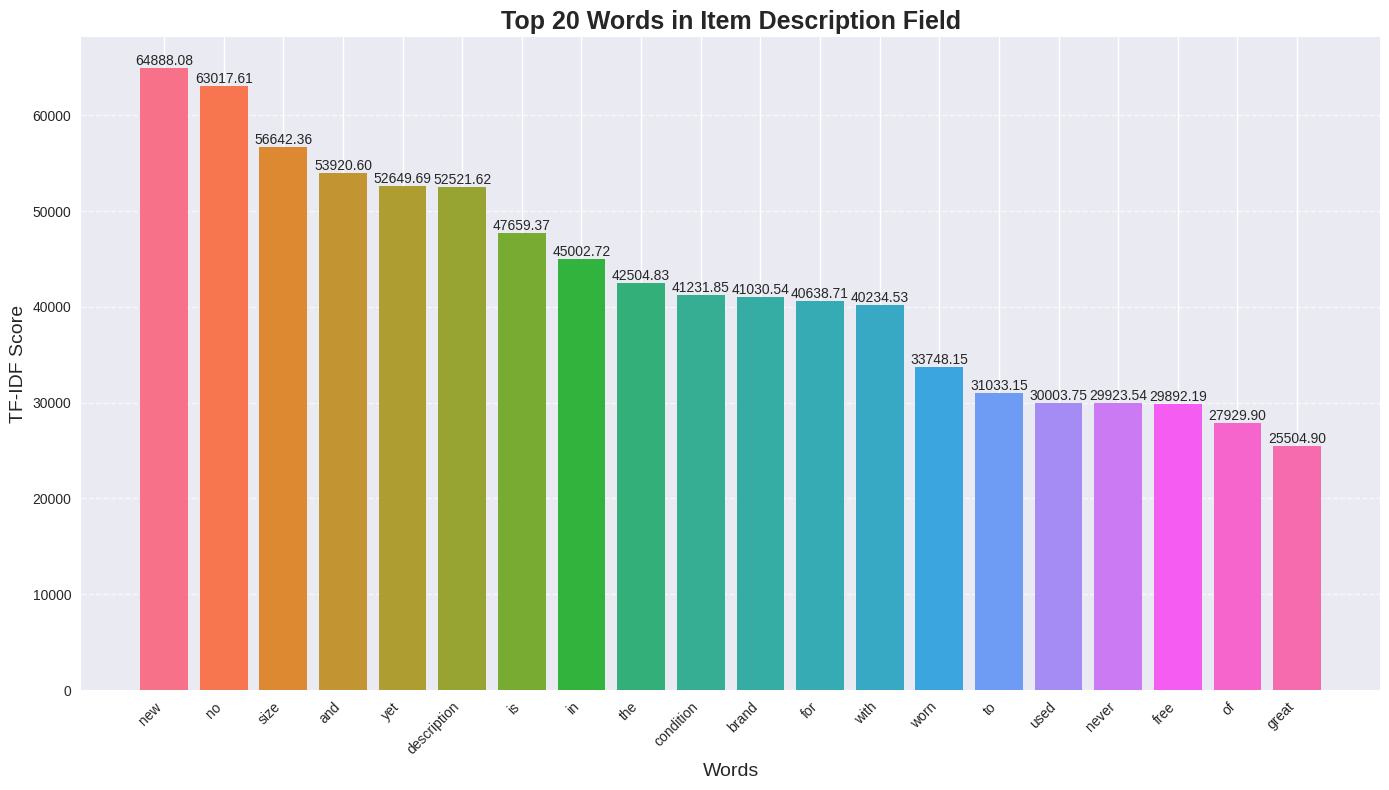

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
plt.style.use('seaborn')
sns.set_palette("husl")

# 그래프 생성 함수
def create_word_frequency_graph(tfidf_matrix, feature_names, title, n_top_words=20):
    tfidf_sums = np.array(tfidf_matrix.sum(axis=0)).flatten()
    top_indices = tfidf_sums.argsort()[-n_top_words:][::-1]

    top_words = [feature_names[i] for i in top_indices]
    top_tfidf = tfidf_sums[top_indices]

    fig, ax = plt.subplots(figsize=(14, 8))
    bars = ax.bar(range(n_top_words), top_tfidf, color=sns.color_palette("husl", n_top_words))

    # 막대 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', rotation=0)

    plt.xticks(range(n_top_words), top_words, rotation=45, ha='right')
    plt.xlabel('Words', fontsize=14)
    plt.ylabel('TF-IDF Score', fontsize=14)
    plt.title(title, fontsize=18, fontweight='bold')

    # 격자 추가
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# 'name' 필드에 대한 그래프 생성
create_word_frequency_graph(df_name_tfidf, vectorizer1.get_feature_names_out(),
                            "Top 20 Words in Name Field")

# 'item_description' 필드에 대한 그래프 생성
create_word_frequency_graph(df_id_tfidf, vectorizer1.get_feature_names_out(),
                            "Top 20 Words in Item Description Field")

In [ ]:
pip install wordcloud

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def create_wordcloud(tfidf_matrix, feature_names, n_top_words=20, title='Word Cloud'):
    # TF-IDF 매트릭스의 열 합계를 계산하여 단어의 중요도 순위를 매깁니다
    tfidf_sums = np.array(tfidf_matrix.sum(axis=0)).flatten()
    top_indices = tfidf_sums.argsort()[-n_top_words:][::-1]

    # 상위 단어와 그 TF-IDF 값으로 딕셔너리를 만듭니다
    top_words = {feature_names[i]: tfidf_sums[i] for i in top_indices}

    # 워드 클라우드 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def show_name_wordcloud(n_top_words=20):
    create_wordcloud(df_name_tfidf, vectorizer1.get_feature_names_out(), n_top_words, title='Top Words in Name Field')

def show_item_description_wordcloud(n_top_words=20):
    create_wordcloud(df_id_tfidf, vectorizer1.get_feature_names_out(), n_top_words, title='Top Words in Item Description Field')

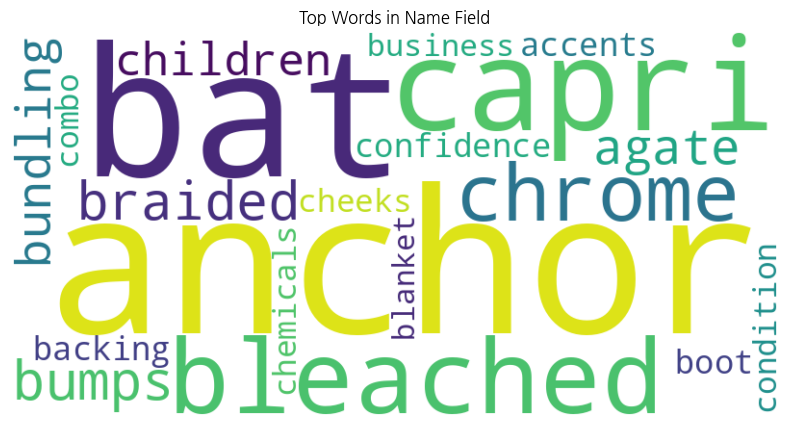

In [ ]:
# 사용 예시:
# 'name' 필드의 워드 클라우드를 보고 싶을 때
show_name_wordcloud()

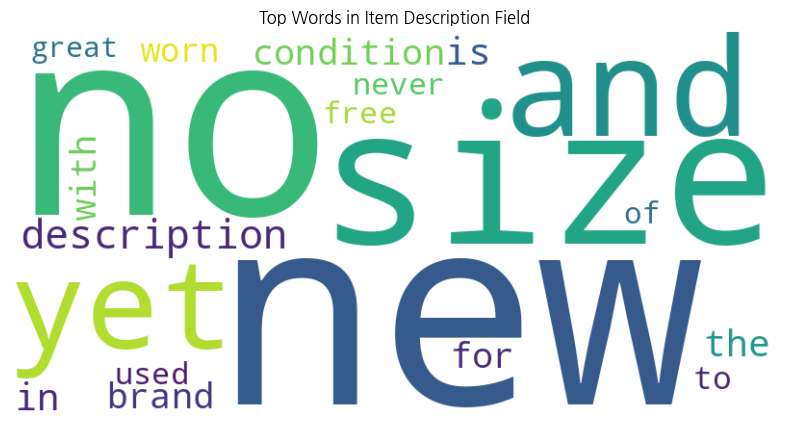

In [ ]:
# 'item_description' 필드의 워드 클라우드를 보고 싶을 때
show_item_description_wordcloud()

In [ ]:
# # 상위 10개 단어만 보고 싶을 때
# show_name_wordcloud(10)
# show_item_description_wordcloud(10)